In [2]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

In [3]:
15 % 2 # resto da divisão por 2

1

In [4]:
14 % 2

0

In [5]:
8 % 5

3

In [6]:
eh_par(n) = (n % 2 == 0)

eh_par (generic function with 1 method)

In [8]:
eh_par(14)

true

In [9]:
x = 3

3

In [29]:
a = x # aₙ
n = 0

0

In [36]:
if eh_par(a)
    a = div(a, 2)
else
    a = 3 * a + 1
end
n += 1
println("n = $n, a = $a")

n = 7, a = 1


**Def. (Algoritmo)**: Um algoritmo é uma coleção de instruções para realizar alguma tarefa específica. Segundo **Knuth** (The Art of Computer Programming, v.1), ele deve satisfazer as seguintes condições, parafraseadas aqui:

- **Finitude**: O algoritmo deve acabar em tempo finito;
- **Bem definido**: As intruções devem ser claras e sem ambiguidade;
- **Entrada**: O algoritmo tem zero ou mais entradas, que são valores determinados antes do algoritmo começar. Essas entradas são especificados a partir de conjuntos de objetos;
- **Saída**: O algoritmo tem uma ou mais saídas, que são quantidades relacionadas com as entradas;
- **Eficácia/Computabilidade**: As operações feitas no algoritmo devem ser suficientemente básicas para que a princípio possam ser executadas por uma pessoa num espaço finito e tempo finito com papel e caneta.

In [70]:
function collact(x :: Integer)
    a = x
    n = 0
#     print("$a ")
    exitflag = :desconhecido
    while a != 1
        if n > 1_000_000
            exitflag = :max_n
            break
        elseif a > 2^61
            exitflag = :max_a
            break
        end
        
        if a % 2 == 0
            a = div(a, 2)
        else
            a = 3a + 1
        end
        n += 1
#         print("→ $a ")
    end
    if a == 1
        exitflag = :sucesso
    end
#     println("")
    return a, n, exitflag
end

collact (generic function with 2 methods)

In [73]:
collact(2^61)

(1, 61, :sucesso)

**Fibonacci**

$$ F_{n+1} = F_n + F_{n-1}, \qquad F_1 = F_2 = 1. $$

In [95]:
Fa = 1
Fb = 1
n = 2

2

In [100]:
# Fc = Fa + Fb
# Fa = Fb
# Fb = Fc
Fa, Fb = Fb, Fa + Fb # (a,b) ← (b, a+b)
n += 1
println("n = $n, Fn = $Fb")

n = 7, Fn = 13


In [ ]:
#=
Entrada: n ≥ 1
1. Se n for igual a 1 ou 2
    1.1 Retorne 1
2. k = 2
3. Fa = Fb = 1
4. Enquanto k < n
    4.1 Fc = Fa + Fb
    4.2 Fa = Fb
    4.3 Fb = Fc
    4.4 k = k + 1
5. Retorna Fc
=#

In [124]:
function fibon(n :: Integer)
    if n < 1
        error("n = $n deve ser ≥ 1")
    end
    # Exercício
    k = 2
    Fa = Fb = 1
    while k < n
        Fa, Fb = Fb, Fa + Fb
        k += 1
    end
    return Fb
end

fibon (generic function with 1 method)

**Recursão**

$n! = n  (n-1)!$ para $n > 0$ e $0! = 1$.

In [135]:
function fatorial(n :: Integer)
#     println("Calculando fatorial de $n")
    if n < 0
        error("Fatorial só para n ≥ 0")
    elseif n == 0
        return 1
    else
        return n * fatorial(n - 1)
    end
end

fatorial (generic function with 1 method)

In [108]:
fatorial(5)

Calculando fatorial de 5
Calculando fatorial de 4
Calculando fatorial de 3
Calculando fatorial de 2
Calculando fatorial de 1
Calculando fatorial de 0


120

In [121]:
function FIBO(n :: Integer)
#     println("Calculando FIBO de $n")
    if n ≤ 0
        error("No FIBO")
    elseif n ≤ 2
        return 1
    else
        return FIBO(n - 1) + FIBO(n - 2)
    end
end

FIBO (generic function with 1 method)

In [113]:
FIBO(7)

Calculando FIBO de 7
Calculando FIBO de 6
Calculando FIBO de 5
Calculando FIBO de 4
Calculando FIBO de 3
Calculando FIBO de 2
Calculando FIBO de 1
Calculando FIBO de 2
Calculando FIBO de 3
Calculando FIBO de 2
Calculando FIBO de 1
Calculando FIBO de 4
Calculando FIBO de 3
Calculando FIBO de 2
Calculando FIBO de 1
Calculando FIBO de 2
Calculando FIBO de 5
Calculando FIBO de 4
Calculando FIBO de 3
Calculando FIBO de 2
Calculando FIBO de 1
Calculando FIBO de 2
Calculando FIBO de 3
Calculando FIBO de 2
Calculando FIBO de 1


13

$$F_n = \frac{\phi^n - \psi^n}{\sqrt{5}}$$

$$\phi = \frac{1 + \sqrt{5}}{2} \quad \text{e} \quad \psi = \frac{1 - \sqrt{5}}{2}$$

In [114]:
ϕ = (1 + sqrt(5)) / 2
ψ = (1 - sqrt(5)) / 2

-0.6180339887498949

In [116]:
round(Int, (ϕ^7 - ψ^7) / sqrt(5))

13

In [127]:
function flibonacci(n)
    ϕ = (1 + sqrt(5)) / 2
    ψ = (1 - sqrt(5)) / 2
    return (ϕ^n - ψ^n) / sqrt(5)
end

flibonacci (generic function with 1 method)

In [128]:
flibonacci(13)

233.00000000000006

In [125]:
fibon(13)

233

In [129]:
for n = 1:80
    println("$n, Fn = $(fibon(n)), dif = $(flibonacci(n) - fibon(n))")
end

1, Fn = 1, dif = 0.0
2, Fn = 1, dif = 0.0
3, Fn = 2, dif = 0.0
4, Fn = 3, dif = 4.440892098500626e-16
5, Fn = 5, dif = 8.881784197001252e-16
6, Fn = 8, dif = 1.7763568394002505e-15
7, Fn = 13, dif = 1.7763568394002505e-15
8, Fn = 21, dif = 3.552713678800501e-15
9, Fn = 34, dif = 7.105427357601002e-15
10, Fn = 55, dif = 1.4210854715202004e-14
11, Fn = 89, dif = 2.842170943040401e-14
12, Fn = 144, dif = 5.684341886080802e-14
13, Fn = 233, dif = 5.684341886080802e-14
14, Fn = 377, dif = 1.7053025658242404e-13
15, Fn = 610, dif = 3.410605131648481e-13
16, Fn = 987, dif = 4.547473508864641e-13
17, Fn = 1597, dif = 9.094947017729282e-13
18, Fn = 2584, dif = 1.8189894035458565e-12
19, Fn = 4181, dif = 2.7284841053187847e-12
20, Fn = 6765, dif = 4.547473508864641e-12
21, Fn = 10946, dif = 7.275957614183426e-12
22, Fn = 17711, dif = 1.0913936421275139e-11
23, Fn = 28657, dif = 2.1827872842550278e-11
24, Fn = 46368, dif = 3.637978807091713e-11
25, Fn = 75025, dif = 5.820766091346741e-11
26, Fn =

### Séries

$$ S = \sum_{k = 1}^{\infty} a_k $$

In [131]:
MathConstants.e

ℯ = 2.7182818284590...

In [132]:
exp(1)

2.718281828459045

In [155]:
function exp1(x, n)
    # 1 + x + x^2 / 2 + x^3 / 3! + x^4 / 4! + ...
    s = 1.0
    for k = 1:n
        s += x^k / factorial(BigInt(k))
    end
    return s
end

exp1 (generic function with 1 method)

In [157]:
exp1(5.0, 35) - exp(5.0)

3.441148947282936382148225177601889751953583544523177517142379781388516455437439e-15

In [152]:
5^17 / factorial(17), eps(exp(5))

(0.0021449716601146854, 2.842170943040401e-14)

In [158]:
function exp2(x, n)
    # 1 + x + x^2 / 2 + x^3 / 3! + x^4 / 4! + ...
    s = 1.0
    a = 1.0
    for k = 1:n
        a = a * x / k
        s += a
    end
    return s
end

exp2 (generic function with 1 method)

In [164]:
exp2(5.0, 32) - exp(5)

-5.684341886080802e-14

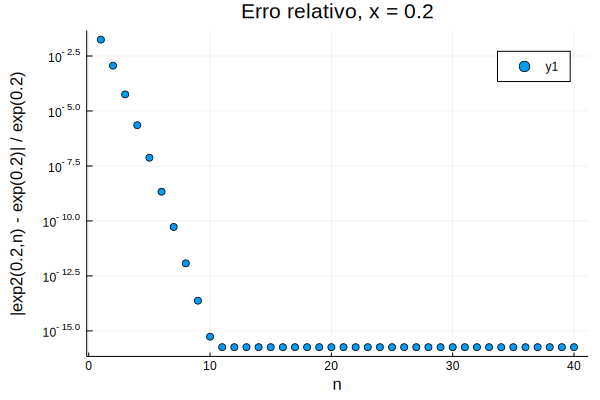

In [169]:
using Plots
N = collect(1:40)
x = 0.2
Erro = [abs(exp2(x, n) - exp(x)) / exp(x) for n in N]
scatter(N, Erro, yaxis=:log)
xlabel!("n")
ylabel!("|exp2($x,n) - exp($x)| / exp($x)")
title!("Erro relativo, x = $x")

In [173]:
function exp3(x)
    # 1 + x + x^2 / 2 + x^3 / 3! + x^4 / 4! + ...
    s = 1.0
    a = 1.0
    k = 1
    while s + a != s 
        a = a * x / k
        s += a
        k += 1
    end
    return s
end

exp3 (generic function with 1 method)

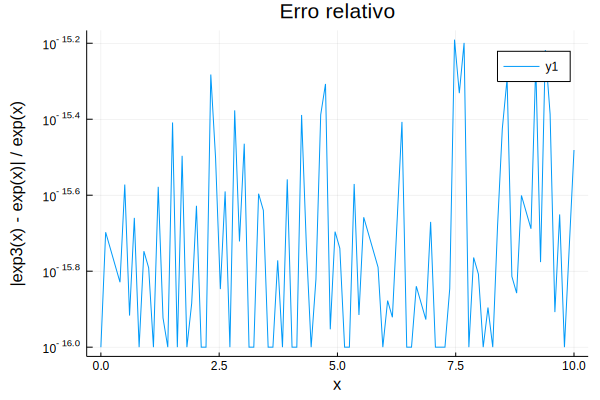

In [184]:
using Plots
X = range(0.0, 10.0, length=100)
Erro = [max(abs(exp3(x) - exp(x)) / exp(x), 1e-16) for x in X]
plot(X, Erro, yaxis=:log)
xlabel!("x")
ylabel!("|exp3(x) - exp(x)| / exp(x)")
title!("Erro relativo")

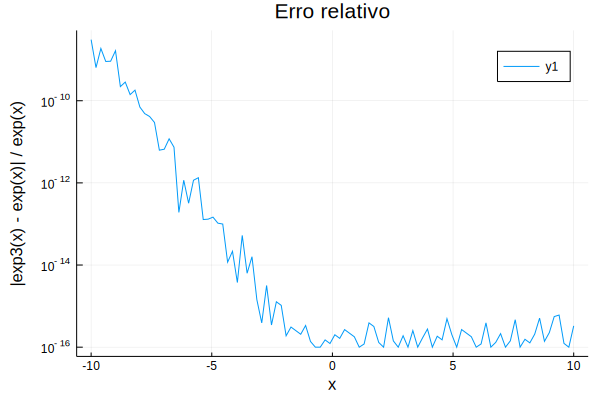

In [185]:
using Plots
X = range(-10.0, 10.0, length=100)
Erro = [max(abs(exp3(x) - exp(x)) / exp(x), 1e-16) for x in X]
plot(X, Erro, yaxis=:log)
xlabel!("x")
ylabel!("|exp3(x) - exp(x)| / exp(x)")
title!("Erro relativo")

In [186]:
function exp4(x)
    if x ≥ 0
        return exp3(x)
    else
        return 1.0 / exp3(-x)
    end
end

exp4 (generic function with 1 method)

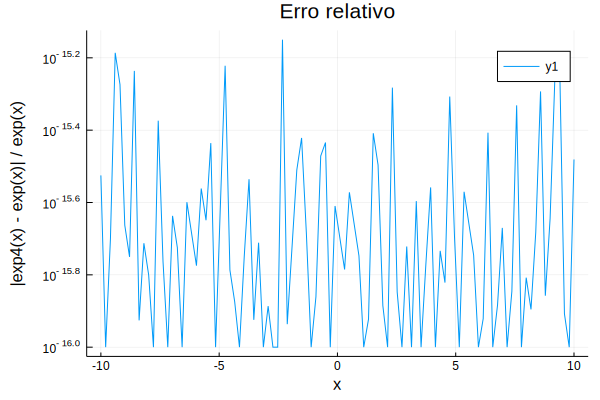

In [187]:
using Plots
X = range(-10.0, 10.0, length=100)
Erro = [max(abs(exp4(x) - exp(x)) / exp(x), 1e-16) for x in X]
plot(X, Erro, yaxis=:log)
xlabel!("x")
ylabel!("|exp4(x) - exp(x)| / exp(x)")
title!("Erro relativo")

$$ \arctan 1 = \frac{\pi}{4} $$

In [190]:
function pi_atan(n)
    # π ≈ 4 * (1 - 1/3 + 1/5 - 1/7 + 1/9 ... (n-ésimo?))
    # n =      1,   2,    3,    4,    5,         
end

pi_atan (generic function with 1 method)

In [188]:
@assert pi_atan(3) ≈ 1.0 - 1.0 / 3.0 + 1.0 / 5.0

UndefVarError: UndefVarError: pi_atan not defined